# User Experience of Artificial Intelligence

## Background

"Machine Learning" is becoming just another tool in a developers toolbox. 

As per [StackOverflow's 2018 survey](https://insights.stackoverflow.com/survey/2018/):
* PyTorch and TensorFlow compete with React as most loved tool by 70% of devs
* 47.8% say "The developers or the people creating the AI" are primarily responsible for ML ramifications
* 72.8% say "I'm excited about the possibilities more than worried about the dangers."

* NeurIPS 2018
  * workshop on ["Ethical, Social and Governance Issues in AI"](https://nips.cc/Conferences/2018/Schedule?showEvent=10940)
  * tutorial on ["Common Pitfalls for Studying the Human Side of Machine Learning"](https://nips.cc/Conferences/2018/Schedule?showEvent=10981)
  * invited talks on [Algorithmic Bias](https://nips.cc/Conferences/2018/Schedule?showEvent=12870), [Public Policy](https://nips.cc/Conferences/2018/Schedule?showEvent=12483) and ["Human-AI Trust"](https://nips.cc/Conferences/2018/Schedule?showEvent=12301)

* Google's UX team 
  * ["Human-Centered Machine Learning"](https://medium.com/google-design/human-centered-machine-learning-a770d10562cd) to guide conversations 
  * Few great publications on [UX of AI](https://design.google/library/ux-ai/) from which I shamelessly stole the title

Machine Learning has the potential to really affect people's lives, for better or for worse, it's new and interesting.

But it's a bit like radioactivity
* **1911** Marie Curie discovers it
* **1925** your watch glows in the dark but all the painters got cancer 
* **1945** Trinity test and Hiroshima
* **1954** first nuclear power plant in Obninsk

<style>
p {
  font-size: 10px
}</style>
For Machine Learning
* **1954-1971** Few people have a neat way of building models, get excited <sup>[1](https://en.wikipedia.org/wiki/Artificial_intelligence#History), [2](https://en.wikipedia.org/wiki/Alexey_Ivakhnenko)</sup>
* **1973-1990** Machine Translation doesn't work and a famous guy 'proves' AI is bunk <sup>[3](https://en.wikipedia.org/wiki/AI_winter)</sup>


* **2012** Wait maybe not, old bug is fixed, everybody is excited again.<sup>[4](https://en.wikipedia.org/wiki/Deep_learning#Deep_learning_revolution)</sup>
* **2016** Cambridge Analytica makes a mess <sup>[5](https://en.wikipedia.org/wiki/Facebook%E2%80%93Cambridge_Analytica_data_scandal)</sup>
* **2017** Everybody gets a creepy talking speaker for their house & car 
* **2018** We hear about Cambridge Analytica but it's a bit late


## Interpretability and Explainability

David J. Spiegelhalter of the Royal Society suggests this:

"Realising the benefits of open data requires
effective communication through a more intelligent
openness: 
* data must be **accessible** and readily
located; 
* they must be **intelligible** to those who wish
to scrutinise them; 
* data must be **assessable** so that judgments can be made about their reliability and the
competence of those who created them; 
* and they must be **usable** by others. "

*-Society, Royal. "Science as an Open Enterprise." (2012).*

* Machine learning models can follow these principles.
* Users have a 'right to explanation'<sup>[1](https://en.wikipedia.org/wiki/Right_to_explanation)</sup>
* This is the law in contexts like: 
  * credit scores in the United States (ECOA)
  * general data in the EU (GDPR)

Christoph Molnar has a great book on this:
["Interpretable Machine Learning:
A Guide for Making Black Box Models Explainable"](https://christophm.github.io/interpretable-ml-book/index.html)

Next few slides:

* Interpretability vs explainability
* Implicitly interpretable models
* Review of model agnostic methods 
* Example based explainations

## Example
Using [SHAP](https://github.com/slundberg/shap) on a [credit dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)

<img src="https://archive.ics.uci.edu/ml/assets/logo.gif">

#### Data

[UCI German Credit Data](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)

#### Source

Professor Dr. Hans Hofmann

_University at Hamburg_

1994-11-17

In [1]:
from aif360.datasets import GermanDataset
from german_credit_data_reason_codes import reason_map, display_description
import german_credit_data_reason_codes
from sklearn.model_selection import train_test_split

## load data
data = GermanDataset()
X, _ = data.convert_to_dataframe()
X.drop(['credit'], axis=1, inplace=True)
y = data.scores.ravel()

## Investigate data
X.describe()
# https://pair-code.github.io/facets/index.html#facets-overview

## Split the data for model training / testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Dataset summary:
* 59 columns, 1000 samples
* age, sex, marital status, resident status, employment status, housing
* types of account, credit history, purpose of loan, other bank data
* classifies a person's credit risk

<img src="facets_overview.png">

<img src="facets_dive.png">

<img src="kaggle_german_summary.png">

In [2]:
from xgboost import XGBClassifier

# train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_probability = model.predict_proba(X_test)

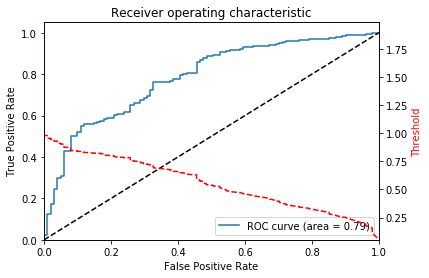

In [3]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probability[:,1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = ax.twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]]);

In [4]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [5]:
display_description("A14")
display_description("A34")
display_description("A11")

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

A14 : no checking account (Status of existing checking account)

A34 : critical account/ other credits existing (not at this bank) (Credit history)

A11 : ... < 0 DM (Status of existing checking account)

A14 : no checking account (Status of existing checking account)

A191 : no telephone

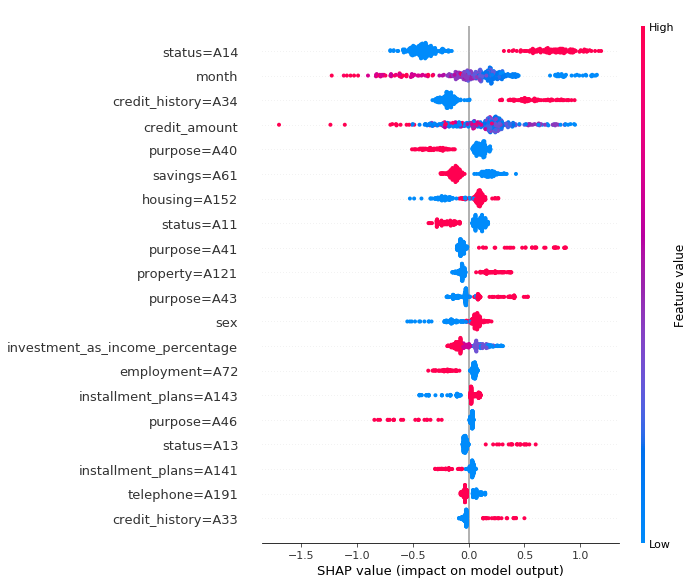

In [6]:
display_description("A14")
# display_description("A34")
# display_description("A40")
# display_description("A61")
# display_description("A152")
# display_description("A11")
# display_description("A41")
# display_description("A121")
# display_description("A43")
# display_description("A72")
# display_description("A143")
# display_description("A46")
# display_description("A13")
# display_description("A141")
display_description("A191")
# display_description("A33")

# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Ethics in AI

Next slides:

Approaches to: 
* Fairness
* Privacy
* Trust
* Inclusion

https://twimlai.com/tag/fairness/

https://www.news.gatech.edu/2016/02/29/emergencies-should-you-trust-robot

https://design.google/library/fair-not-default/

https://github.com/dssg/aequitas 

https://pypi.org/project/aif360/

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

ModuleNotFoundError: No module named 'aequitas'

## Designing with AI in mind

Donald Norman, author of "The Design of Everyday Things" suggests designing to these principles:
* **visibility** - what you see
* **affordance** - cues for interaction
* **mapping** - connecting control and effect
* **feedback** - response to interaction
* **constraints** - what you can't do
* **consistancy** - helping users learn from patterns

Next slides: 
Applying these principles to AI

https://design.google/library/ai/

https://medium.com/google-design/human-centered-machine-learning-a770d10562cd